<a href="https://www.kaggle.com/code/wenbinyeung/capstone-bellabeat-case-study-using-r?scriptVersionId=249264933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

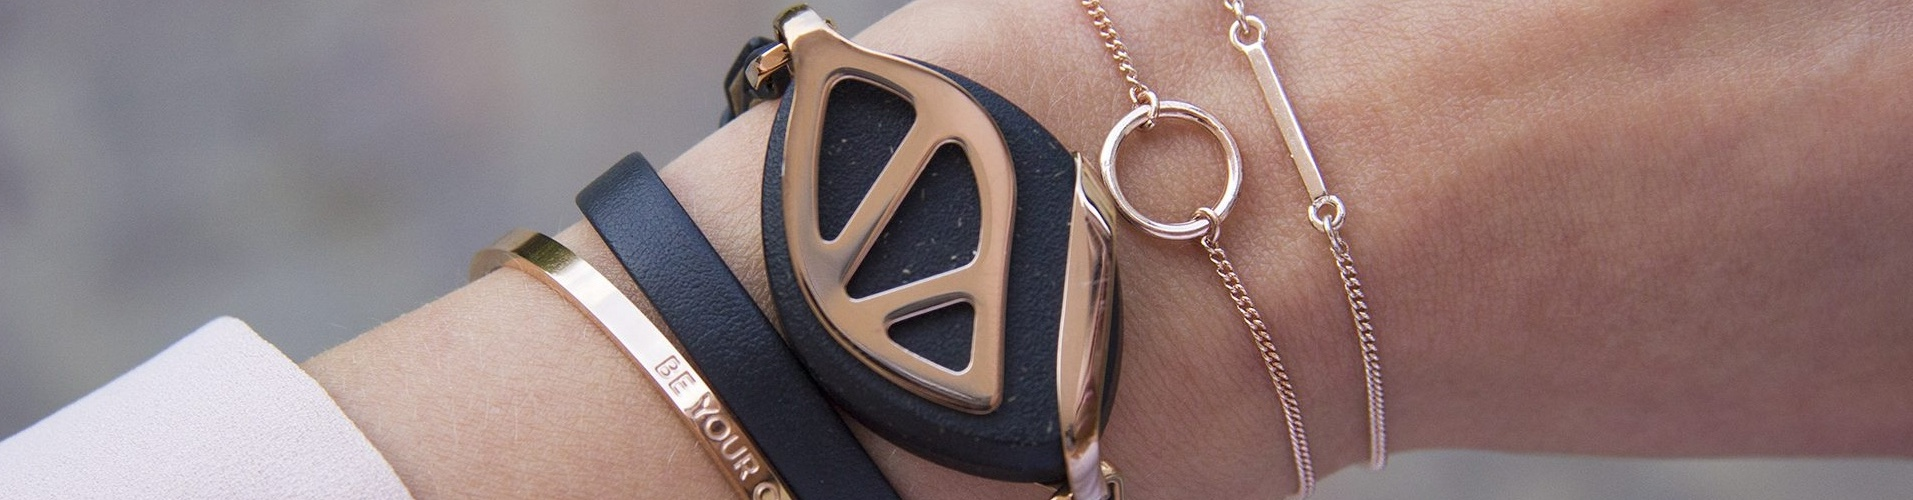
<h1>
    <center>
        Bellabeat Capstone Project 🏆
    </center>
</h1>

**Important Note**: This capstone project is part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).

To view this project on GitHub, [click here](https://github.com/WenBin-Y/Google-Data-Analytics-Capstone)!

Course Completed: April 2023 | Notebook Last Updated: July 2025


Hello! Welcome to my first notebook on Kaggle! 😆

Looking to specialise in Business Analytics, I have decided to embark on this course and this is one of hopefully many projects that I will embark on throughout my career. 

This notebook marks my **first post** on Kaggle so if you like it, do upvote it and I appreciate all the feedback you can give me on areas that I can improve on! Thank you and I hope you have a great time looking through this notebook!


***

<div id="thetask">
    <h1>
        Part 1. Understanding The Task 🧐❓
    </h1>
</div>


## 1.1 About Bellabeat

Bellabeat is a high-tech company that manufactures health-focused smart products, and was founded in 2013 by Urška Sršen and Sando Mur.

As of 2022, Bellabeat had a peak revenue of USD 30.0M, with one of its products the Bellabeat Ivy, being selected as one of TIME's 2022 Best Inventions [[1]](https://www.zippia.com/bellabeat-careers-1410169/revenue/)[[2]](https://en.wikipedia.org/wiki/Bellabeat#:~:text=Bellabeat%20is%20a%20Silicon%20Valley,cycle%2C%20mindfulness%2C%20and%20activity). The devices that Bellabeat creates are centered around monitoring women's health, through tracking metrics like **activity**, **sleep**, **stress**, **menstrual cycle**, and **mindfulness habits**.

## 1.2 The Task & Guiding Questions 
To **analyse smart device usage data** in order to **gain insight into how consumers use non-Bellabeat smart devices**, as well as to **apply the insights** into one of the following Bellabeat's products:
* Bellabeat app 
* Leaf - Bellabeat's classic wellness tracker
* Time - wellness watch
* Spring - water bottle

**Guiding Questions**:
* What are some trends in smart device usage? 
* How could these trends apply to Bellabeat customers? 
* How could these trends help influence Bellabeat marketing strategy?

***
<div id="dataprep">
    <h1>
        Part 2. Data Preparation 🤔
    </h1>
</div>

<div id="summaryprep">
    <h2>
        2.1 Data Preparation (Summary)
    </h2>
</div>

This section coveres the **summary** of the data preparation and cleaning process. 
To refer to the **detailed breakdown**, please [click here](#detailedprep).

The packages used are: *tidyverse* and *dplyr*
The *tidyverse* package already includes packages like *readr* and *ggplot2*, which will also be used.

A key reason for only using these 2 datasets is due to the fact that they are the only datasets with **sample size >= 30**. This helps to ensure that **Central Limit Theorem** (CLT) holds true, and that the samples are **normally distributed**. For more on the importance of Central Limit Theorem, you can refer to this article published by [towardsdatascience.com](https://towardsdatascience.com/why-is-central-limit-theorem-important-to-data-scientist-49a40f4f0b4f), written by Saurav Singla.

In [ ]:
# Load packages:
library(dplyr)
library(tidyverse)

In [ ]:
# Load & name datasets:
daily_activity <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_intensity <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')

In [ ]:
# Ensuring sample size of dataset > 30 (Central Limit Theorem holds true)
n_distinct(daily_activity$Id) # 33


# Checking for Null values
sum(is.na(daily_activity)) # No NULL values


# Checking for duplicates
summary(duplicated(daily_activity)) # No duplicates


# Data transformation (daily_activity): 
# Converting ActivityDate from chr to date format
daily_activity <- mutate(daily_activity,
                         Date = as.Date(ActivityDate, format = "%m/%d/%Y")) # Capital Y here to include the century
head(daily_activity)


# Data transformation (hourly_intensity)
# Convert ActivityDate from chr to date, and time formats
hourly_intensity <- mutate(hourly_intensity,
                           Act_Hour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone()),
                           Date = as.Date(Act_Hour, format = "%m/%d/%Y"),
                           Time = format(Act_Hour, format = "%H:%M:%S"))
head(hourly_intensity)

From the above codes, I have loaded the relevant datasets and ensured that:
* Sample size of dataset is **large enough to assume CLT**.
* There are **no duplicates or NULL values**.
* Date and time fields are **properly formatted**.

We can now proceed with the next part of the project: data exploration and analysis! 

***

<div id="explore">
    <h1>
        Part 3. Data Exploration & Analysis 🕵🏼📈
    </h1>
</div>

After cleaning and prepariong the data, we are now able to deep dive into the datasets and discover unique trends. In this following segment, I will share **3 trends** that I discovered, while also sharing **possible implications it can have in bellabeat's marketing strategy**.

## 3.1 Wearers Spend A Majority Of Their Days With Their Fitbits
By creating the necessary fields, we are able to measure the **percentage of day** wearers have their fitbit devices on them.

In [ ]:
# Creating TotalMinutes and PercentageOfDay fields
activity <- mutate(daily_activity, 
                   TotalMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes,
                   PercentageOfDay = TotalMinutes * 100 / (60*24))
head(activity)


In [ ]:
# Wearers Spend A Majority Of Their Days With Their Fitbits
ggplot(activity, aes(x = '',y = PercentageOfDay)) + 
  geom_boxplot(width = 0.4, fill = '#F28585') +
  labs(title = 'Wearers Spend A Majority Of Their days With Their Fitbits',
       subtitle = 'Data Of 33 Respondents Was Tracked From 12th April 2016 - 12th May 2016',
       x = 'Survey Respondents',
       y = 'Percentage Of Day (%)') + 
  stat_summary(geom = 'text', fun = quantile,
               aes(label = round(after_stat(y),2)),
               position = position_nudge(x = 0.33), size = 3.5)

From the box and whisker plot, we can deduce that **>= 75% of wearers (roughly 25 wearers)** had worn their fitbit devices for **>= 68.73% of the day**!

**Key Insight**:
Since a significant number of fitbit wearers wear their devices for a significant portion of the day, **to ensure wearers buy from bellabeat**, the devices itself have to:
* Feel comfortable to the wearer.
* Have long battery lives that can last through multiple days without charging.




## 3.2 A Large Portion Of Wearers Lead Sedentary Lifestyles
Curious about how often wearers were active, I decided to analyse the average number of minutes a wearer logged in a particular activity type.

In [ ]:
# Factorising weekday
activity <- mutate(activity,
                   Weekday = weekdays(Date))
activity$Weekday <- factor(activity$Weekday, 
                              levels = c('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
head(activity)
# This helps to ensure that when we visualise the data, the days of the week follow the order of Monday, Tuesday etc.


# Average mins per activity type
activity %>%
  summarise(avg_Very_Active_Mins = mean(VeryActiveMinutes),
            avg_Fairly_Active_Mins = mean(FairlyActiveMinutes),
            avg_Lightly_Active_Mins = mean(LightlyActiveMinutes),
            avg_Sedentary_Mins = mean(SedentaryMinutes))


# Average minutes per activity type for each day of the week
mycolors <- c('#ABA9D9', '#9CD7F1', '#D8D8D8', '#F28585') # Colour palette for visualisation later on
avg_act <- activity %>%
  group_by(Weekday) %>%
  summarise(avg_Very_Active_Mins = mean(VeryActiveMinutes),
            avg_Fairly_Active_Mins = mean(FairlyActiveMinutes),
            avg_Lightly_Active_Mins = mean(LightlyActiveMinutes),
            avg_Sedentary_Mins = mean(SedentaryMinutes)) %>% 
  pivot_longer(cols = c('avg_Very_Active_Mins', 'avg_Fairly_Active_Mins', 'avg_Lightly_Active_Mins', 'avg_Sedentary_Mins')) # "lengthens" data, increasing the number of rows and decreasing the number of columns
head(avg_act)


In [ ]:
# A Large Portion Of Wearers Lead Sedentary Lifestyles
ggplot(avg_act, aes(Weekday, value)) +
  geom_col(aes(fill=name)) +
  scale_fill_manual(values = mycolors, 
                    labels = c('Fairly Active Mins','Lightly Active Mins','Sedentary Mins','Very Active Mins')) +
  labs(title = "A Large Portion Of Wearers Lead Sedentary Lifestyles",
       subtitle = 'Average number of minutes the 33 respondents spent on each activity type over the week',
       x = "Day Of Week",
       y = "Total Minutes",
       fill = 'Activity Type') +
  theme(legend.position = 'top')


From the bar graph created, we can deduce that a **significant portion of a wearer's day is sedentary**.
Analysing the table, we find that the **average number of very active and fairly active minutes in a week** is 7*(21 + 14) = 245 minutes.

The **Centers For Disease Control and Prevention** (CDC) recommend about **150 mintues of moderate-intensity physical activities** and **2 days of muscle strengthening activites** in a week [[3]](https://www.cdc.gov/physicalactivity/basics/adults/index.htm#:~:text=Each%20week%20adults%20need%20150,Physical%20Activity%20Guidelines%20for%20Americans.&text=We%20know%20150%20minutes%20of,do%20it%20all%20at%20once.).

While the 245 minutes clocked by wearers might satisfy the 150 minutes per week recommendation by the CDC, I feel that it does not sufficiently meet the '2 days of muscle strengthening activities' requirement. The wearers might not be exercising enough.

**Key Insight**: As **maintaining good mental and physical health** is an important part of many adults' lives, Bellabeat can differentiate itself by:
* **Sending reminders** to wearers to clock in their daily activity.
* Send **periodic reports** to wearers through the mobile app to let them see how they are **performing in terms of physical health**. 


## 3.3 Wearers' Were Most Active During The Evening
After the previous discovery, I decided to investigate if there is a popular time for wearers to exercise or clock in their activity.

In [ ]:
# Respondents Were Most Active During The Evening
hourly_intensity %>% 
  group_by(Time) %>% 
  drop_na() %>% 
  summarise(avg_intensity = mean(TotalIntensity)) %>% 
  ggplot(aes(x = Time, y = avg_intensity)) +
    geom_col(fill = '#F28585') +
    labs(title = 'Respondents Were Most Active During The Evening',
         subtitle = 'Average intensity of the 33 respondents throughout the day',
         x = 'Time Of Day',
         y = 'Average Intensity') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

From the bar graph, we can deduce that wearers log in the most intensive activities during the evening, from 5pm - 7pm. This correlates to the time frame where **most adults get off of work**. In this case, wearers could have potentially hit the gym, went for a run or play sports during this time period.

**Key Insight**: As there might be a schedule for wearers to clock in their physical activities, to **differentiate from competitors**, Bellabeat's products can:
* **Learn the schedules of wearers**, and **send reminders during their most active periods** to remind users to clock in their daily physical activities.

***

<div id="recommend">
    <h1>
        Part 4. Recommendations To Bellabeat 💡
    </h1>
</div>

After exploring and analysing the datasets and discovering the key insights, these are my recommendations for Bellabeat's Marketing Strategy:

**Product**: Bellabeat app
**Target Audience**: **Middle-aged women** working full time jobs.
**Pain point**: They are **conscious of their physical health**, but currently lead **sedentary lifestyles** and **desire to have an organised and convenient way of tracking their physical health**.


Through **downloading the Bellabeat app** and **syncing with their Bellabeat device**, these women will have access to the following features:
1. Daily reminders to clock in their physical activity.
2. Weekly or monthly reports to view how well they have been performing in terms of physical health.
3. The Bellabeat app will show the battery life of their Bellabeat device, and notify them should it require charging.
4. Create groups in the Bellabeat app. Family and friends can join these groups and motivate one another to lead a healthy lifestyle through completing their daily physical activity.

That brings an end to my **analysis on the Bellabeat Case Study**! Thank you for reading this far and I hope that you have a great day ahead!!! 😊😆🥳

***

<div id="detailedprep">
    <h1>
        <center>
        Part 2. Data Preparation (Detailed Breakdown)
        <center/>
    </h1>
</div>


This section coveres the **detailed breakdown** of the data preparation and cleaning process. 
To refer back to the summary, please [click here](#summaryprep)

## 2.2 Loading Datasets

In [ ]:
# Loading datasets (activity, calories, intensities and sleep)
daily_calories <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensities <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
daily_steps <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')


In [ ]:
# Loading datasets (sleep, weight and hourly intensity)
daily_sleep <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
hourly_intensity <- read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')

## 2.3 Previewing Datasets


In [ ]:
# Previewing the first few rows of each dataset.
head(daily_activity)
head(daily_calories)
head(daily_intensities)
head(daily_steps)
head(daily_sleep)
head(weight)
head(hourly_intensity)

In [ ]:
# Counting total records
nrow(daily_activity)
nrow(daily_calories)
nrow(daily_intensities)
nrow(daily_steps)

After previewing the dataset, I realised that the *daily_activity* table consists of fields from *daily_calories*, *daily_intensities* and *daily_steps* tables.

The number of records from each of the tables also match, all records are preserved and moving forward, I will use the *daily_activity* table instead of using 3 separate tables

## 2.4 Checking Sample Size

In [ ]:
n_distinct(daily_activity$Id) # 33
n_distinct(daily_sleep$Id) # 24
n_distinct(weight$Id) # 8

As the *daily_activity* is the only dataset with number of unique IDs >= 30, I will only use the *daily_activity* table to ensure that the Central Limit Theorem holds true.